<a href="https://colab.research.google.com/github/ilhamrozie/well_log_analysis/blob/main/wellvisBY_formeval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone the git repo for formation eval

In [1]:
!git clone https://github.com/yohanesnuwara/formation-evaluation
import sys
sys.path.append('/content/formation-evaluation')

fatal: destination path 'formation-evaluation' already exists and is not an empty directory.


Import modules

In [2]:
from well_log_display import well_log_display
from triple_combo import triple_combo
from ND_plot import ND_plot
from label_generator import label_generator

In [3]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!pip install lasio
import lasio

In [5]:
well_by11 = lasio.read('/BY11.LAS') # put '/' as the directory is different
well_by13 = lasio.read('/BY13.LAS')
well_by15 = lasio.read('/BY15.LAS')
well_by18 = lasio.read('/BY18D.LAS')
well_by7 = lasio.read('/BY7.LAS')

well_by11.keys()

['DEPTH', 'CALI', 'DLT', 'GR', 'RILD', 'RHOB', 'RILM', 'RLL8', 'SP']

**Billie Yates 11 Well**

In [6]:
well_by11.curves

[CurveItem(mnemonic="DEPTH", unit="FT", value="", descr="Depth", original_mnemonic="DEPTH", data.shape=(2413,)),
 CurveItem(mnemonic="CALI", unit="INS", value="", descr="Caliper", original_mnemonic="CALI", data.shape=(2413,)),
 CurveItem(mnemonic="DLT", unit="US/FT", value="", descr="Borehole Compensated Sonic Travel Time", original_mnemonic="DLT", data.shape=(2413,)),
 CurveItem(mnemonic="GR", unit="API", value="", descr="Gamma Ray", original_mnemonic="GR", data.shape=(2413,)),
 CurveItem(mnemonic="RILD", unit="OHMM", value="", descr="Deep Induction Resistivity", original_mnemonic="RILD", data.shape=(2413,)),
 CurveItem(mnemonic="RHOB", unit="G/CC", value="", descr="Formation Density Compensated", original_mnemonic="RHOB", data.shape=(2413,)),
 CurveItem(mnemonic="RILM", unit="OHMM", value="", descr="Medium Induction Resistivity", original_mnemonic="RILM", data.shape=(2413,)),
 CurveItem(mnemonic="RLL8", unit="OHMM", value="", descr="Laterlog 8 Resistivity", original_mnemonic="RLL8", 

In [7]:
by11 = well_by11.df().reset_index()

In [8]:
by11

,DEPTH,CALI,DLT,GR,RILD,RHOB,RILM,RLL8,SP
0,4544.0,9.388,89.015999,132.179001,3.833,2.585,4.021,6.702,-23.257757
1,4544.5,9.242,88.656998,135.354004,3.886,2.551,4.088,6.343,-22.968143
2,4545.0,9.165,88.391998,138.278000,3.940,2.512,4.156,6.002,-22.678526
3,4545.5,9.148,86.741997,137.011993,4.035,2.572,4.179,6.331,-22.096573
4,4546.0,9.212,85.092003,134.904007,4.084,2.548,4.175,6.478,-22.132607
...,...,...,...,...,...,...,...,...,...
2408,5748.0,7.506,NaN,NaN,NaN,2.335,NaN,NaN,NaN
2409,5748.5,7.467,NaN,NaN,NaN,2.315,NaN,NaN,NaN
2410,5749.0,7.368,NaN,NaN,NaN,2.294,NaN,NaN,NaN
2411,5749.5,7.267,NaN,NaN,NaN,2.280,NaN,NaN,NaN


In [9]:
by11.columns

Index(['DEPTH', 'CALI', 'DLT', 'GR', 'RILD', 'RHOB', 'RILM', 'RLL8', 'SP'], dtype='object')

In [10]:
by11.describe()
by11.max()

DEPTH    5750.000000
CALI       11.152000
DLT       108.547997
GR        188.371994
RILD      201.389999
RHOB        2.772000
RILM      211.636002
RLL8      855.851013
SP        -10.000001
dtype: float64

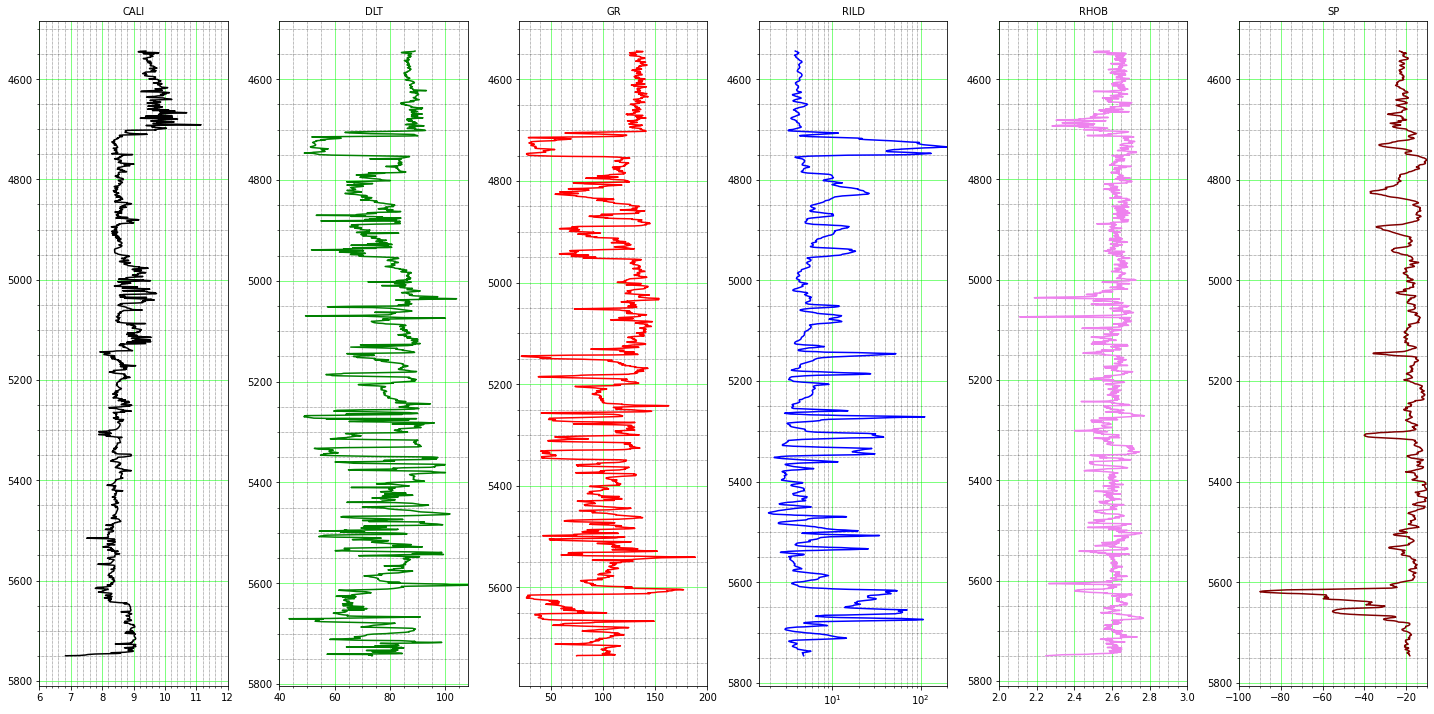

In [11]:
column_depth_11 = 'DEPTH'
column_list_11 = ['CALI', 'DLT', 'GR', 'RILD', 'RHOB', 'SP']
well_log_display(by11, column_depth_11, column_list_11, column_semilog=3, column_min=[6, 40, 20, 1.5, 2, -100], column_max=[12, 108, 200, 200, 3, -10], colors=['black','green','red','blue','violet','maroon'])

**Billie Yates 13 well**


In [12]:
by13 = well_by13.df().reset_index()
by13

,DEPTH,CALI,GR,NPHI,RILD,RHOB,RILM,RLL3,SP
0,4544.5,NaN,NaN,NaN,NaN,NaN,NaN,4.612,-11.383566
1,4545.0,NaN,NaN,NaN,NaN,NaN,NaN,4.600,-11.382464
2,4545.5,NaN,NaN,NaN,NaN,NaN,4.507,4.677,-11.762505
3,4546.0,NaN,NaN,NaN,4.344,NaN,4.507,4.620,-12.577662
4,4546.5,NaN,82.683998,NaN,4.398,NaN,4.563,4.677,-11.977309
...,...,...,...,...,...,...,...,...,...
2547,5818.0,5.985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2548,5818.5,5.984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2549,5819.0,5.982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2550,5819.5,5.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
by13.max()

DEPTH    5820.000000
CALI       14.368000
GR        127.893997
NPHI       30.000000
RILD       68.491997
RHOB        2.791000
RILM       98.198997
RLL3      217.317993
SP        -10.000001
dtype: float64

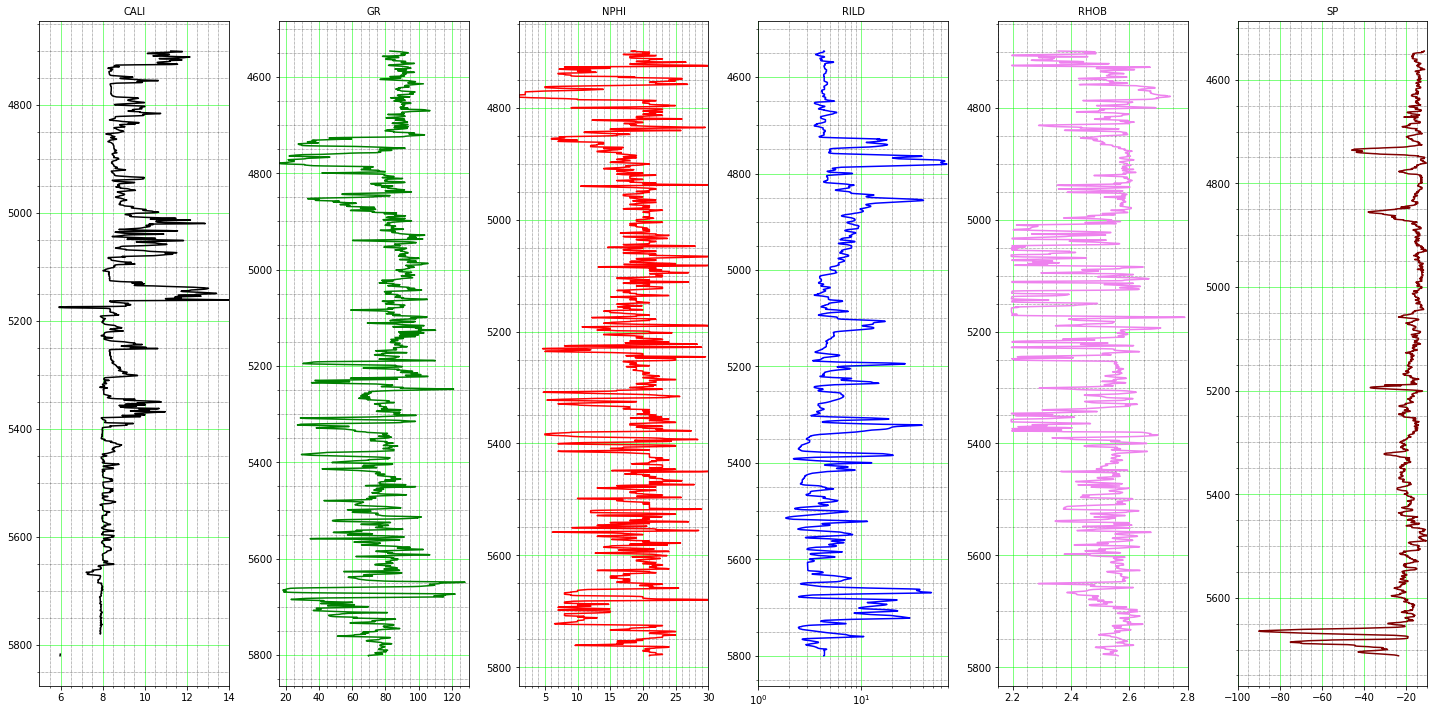

In [14]:
column_depth_13 = 'DEPTH'
column_list_13 = ['CALI', 'GR', 'NPHI', 'RILD', 'RHOB', 'SP']
well_log_display(by13, column_depth_13, column_list_13, column_semilog=3, column_min=[5, 16, 1, 1, 2.15, -100], column_max=[14, 130, 30, 70, 2.8, -10], colors=['black','green','red','blue','violet','maroon'])

**Billie Yates 15**

In [15]:
by15 = well_by15.df().reset_index()

In [16]:
by15.describe()

,DEPTH,CALI,GR,NPHI,PEF,RILD,RHOB,RILM,RSFL,SP
count,2539.000000,2513.000000,2500.000000,2208.000000,2207.000000,2531.000000,2513.000000,2531.000000,2538.000000,2532.000000
mean,5228.500000,9.561662,100.327485,23.055786,2.723263,8.443475,2.498034,8.828820,20.945696,-20.432757
std,366.545245,1.333200,23.097823,7.055496,0.500970,11.447687,0.146525,11.709390,78.559175,9.919674
min,4594.000000,7.090000,7.996000,1.600000,1.272000,2.336000,1.996000,2.393000,2.779000,-90.000000
25%,4911.250000,8.659000,89.806747,19.204250,2.482000,4.456000,2.459000,4.500000,5.475000,-22.128494
50%,5228.500000,9.439000,105.858002,24.602999,2.659000,5.365000,2.548000,5.412000,6.597500,-19.259228
75%,5545.750000,10.555000,117.826997,29.791750,2.971500,7.391000,2.589000,7.718500,10.958000,-15.468857
max,5863.000000,13.621000,137.763000,30.200001,5.130000,118.012001,2.749000,116.351997,1324.026001,-10.000001


In [17]:
by15.min()

DEPTH    4594.000
CALI        7.090
GR          7.996
NPHI        1.600
PEF         1.272
RILD        2.336
RHOB        1.996
RILM        2.393
RSFL        2.779
SP        -90.000
dtype: float64

In [18]:
by15.max()

DEPTH    5863.000000
CALI       13.621000
GR        137.763000
NPHI       30.200001
PEF         5.130000
RILD      118.012001
RHOB        2.749000
RILM      116.351997
RSFL     1324.026001
SP        -10.000001
dtype: float64

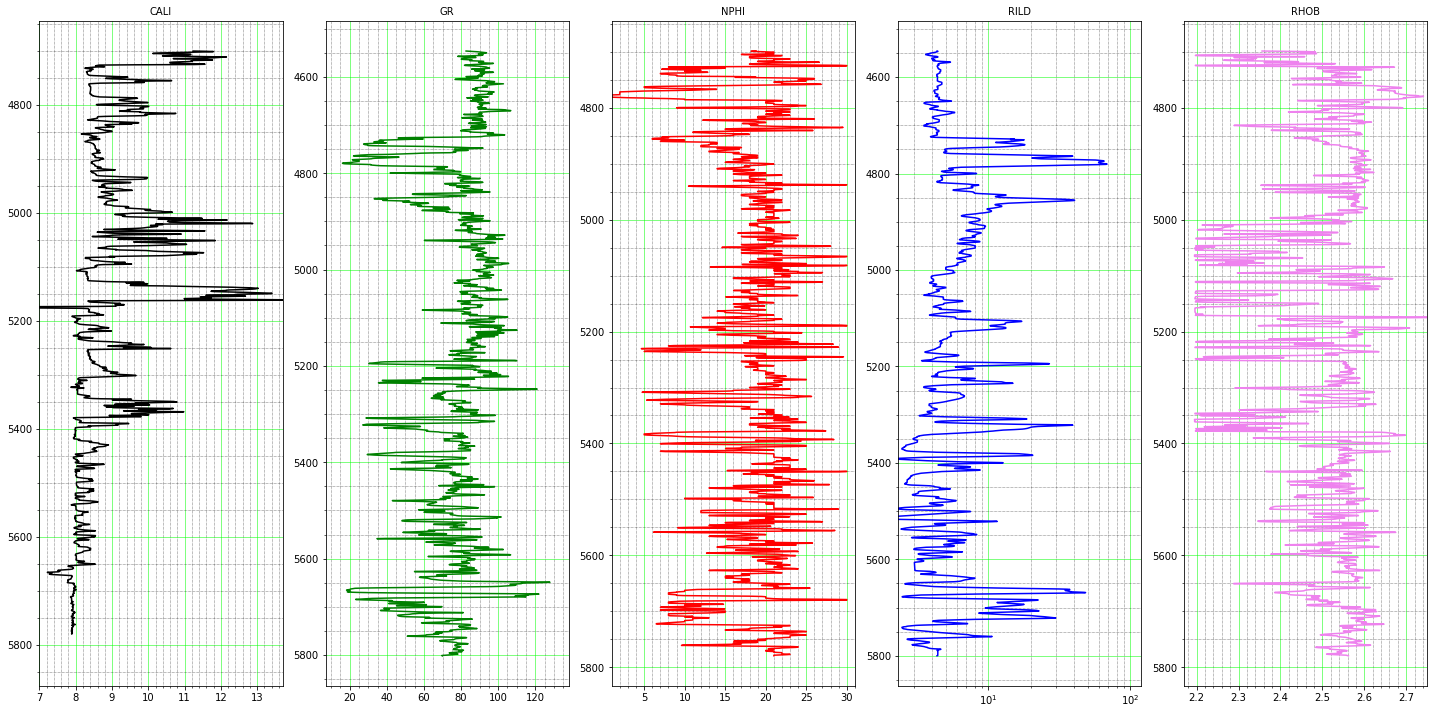

In [19]:
column_depth_15 = 'DEPTH'
column_list_15 = ['CALI', 'GR', 'NPHI', 'RILD', 'RHOB']
well_log_display(by13, column_depth_15, column_list_15, column_semilog=3, column_min=[7, 7, 1, 2.3, 2.17], column_max=[13.7, 138, 31, 119, 2.75], colors=['black','green','red','blue','violet','maroon'])

In [ ]:
pd.set_option('display.max_rows', None)
by15['NPHInew'] = by15['NPHI']/100
by15['NPHInew']

Triple Combo Log for BY15

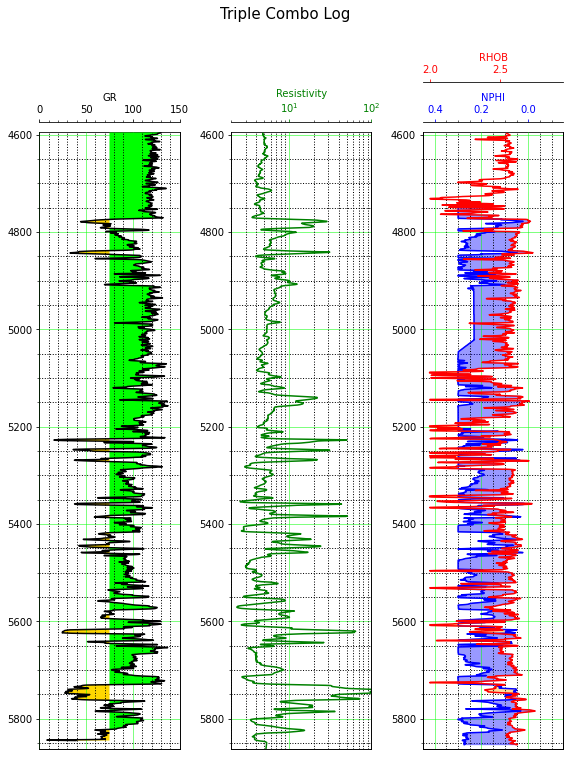

In [45]:
column_GR_15 = 'GR'
column_resistivity_15 = 'RILD'
column_NPHI_15 = 'NPHInew'
column_RHOB_15 = 'RHOB'
min_depth = 4594 
triple_combo(by15, column_depth_15, column_GR_15, column_resistivity_15, column_NPHI_15, column_RHOB_15, min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=75, min_resistivity=2, max_resistivity=100, color_GR='black', color_resistivity='green', color_RHOB='red', color_NPHI='blue', figsize=(6, 10), tight_layout=1, title_size=15, title_height=1.05)

**Billie Yates 18D**

In [34]:
by18 = well_by18.df().reset_index()

In [35]:
by18.describe()

,DEPTH,CALI,DLT,GR,RILD,RILM,MINV,MNOR,NPHI,PEF,RHOB,RSFL,SFLU,SP
count,2081.000000,2081.000000,2047.000000,2033.000000,2081.000000,2081.000000,2081.000000,2081.000000,2044.000000,2081.000000,2081.000000,2078.000000,2081.000000,2074.000000
mean,5220.000000,8.518592,78.459844,96.992682,9.837071,12.227497,11.448246,11.052898,22.772457,3.237665,2.557540,27.028192,27.016946,-21.283040
std,300.438638,0.707744,9.723567,29.031673,10.249238,17.660395,15.227387,17.447756,8.870541,0.498694,0.085648,61.921973,61.878054,12.512137
min,4700.000000,7.488700,48.400002,16.206430,2.388400,2.573800,1.975000,1.882100,1.887910,1.842737,2.063085,2.687000,2.686600,-90.000000
25%,4960.000000,8.027700,72.199997,86.542503,4.782800,5.032700,3.939700,3.710400,17.266524,2.961561,2.518928,6.327500,6.329300,-20.520851
50%,5220.000000,8.311000,79.900002,104.188995,6.191000,6.559000,6.430600,5.051900,24.171719,3.200375,2.578265,8.240000,8.244000,-17.507087
75%,5480.000000,8.757500,85.199997,117.015976,9.605600,10.646100,10.489300,10.581600,28.927819,3.450054,2.607437,15.043500,15.071900,-15.953309
max,5740.000000,11.824100,109.199997,176.644424,73.168404,154.690308,129.636902,162.048904,49.554668,6.403079,2.766658,642.466003,642.465881,-9.999994


In [36]:
by18.min()

DEPTH    4700.000000
CALI        7.488700
DLT        48.400002
GR         16.206430
RILD        2.388400
RILM        2.573800
MINV        1.975000
MNOR        1.882100
NPHI        1.887910
PEF         1.842737
RHOB        2.063085
RSFL        2.687000
SFLU        2.686600
SP        -90.000000
dtype: float64

In [37]:
by18.max()

DEPTH    5740.000000
CALI       11.824100
DLT       109.199997
GR        176.644424
RILD       73.168404
RILM      154.690308
MINV      129.636902
MNOR      162.048904
NPHI       49.554668
PEF         6.403079
RHOB        2.766658
RSFL      642.466003
SFLU      642.465881
SP         -9.999994
dtype: float64

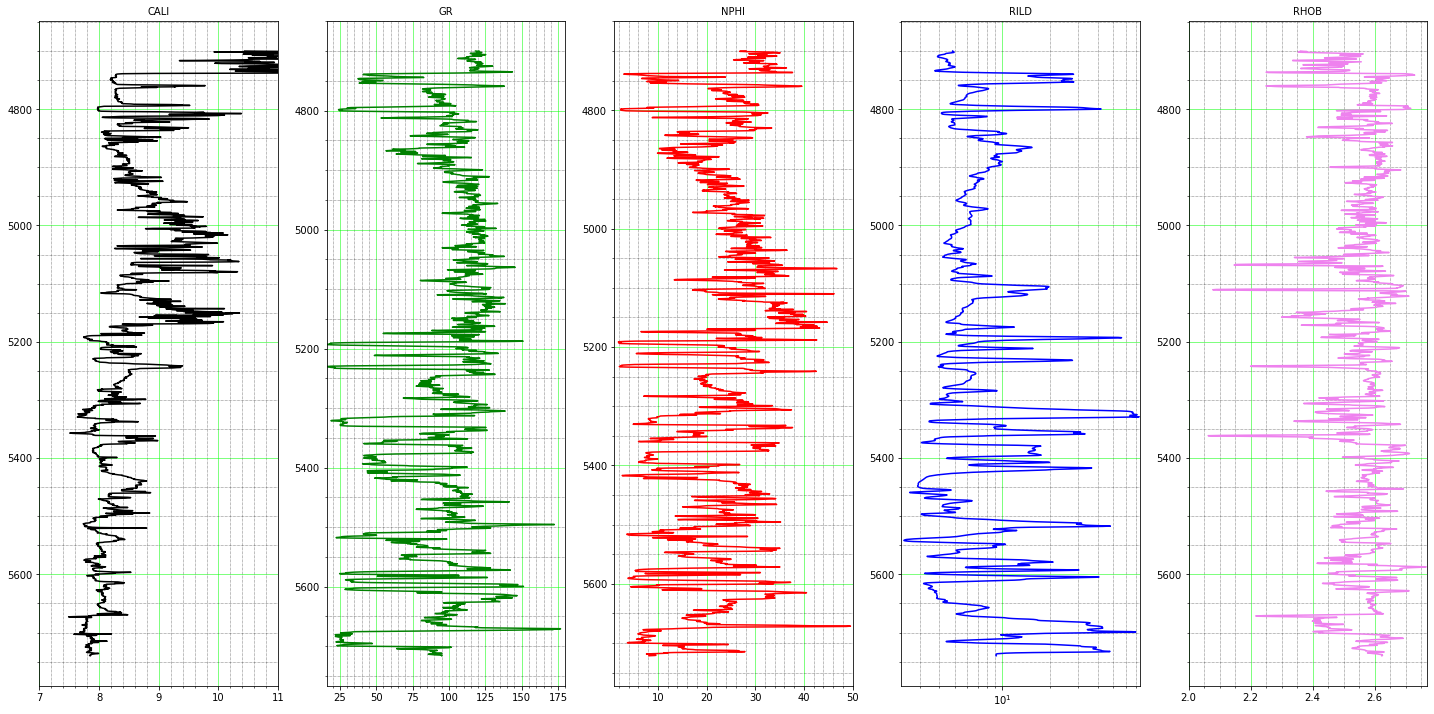

In [38]:
column_depth_18 = 'DEPTH'
column_list_18 = ['CALI', 'GR', 'NPHI', 'RILD', 'RHOB']
well_log_display(by18, column_depth_18, column_list_18, column_semilog=3, column_min=[7, 16, 1, 2.3, 2], column_max=[11, 180, 50, 74, 2.77], colors=['black','green','red','blue','violet','maroon'])

Triple Combo Log

In [ ]:
by18['NPHInew'] = by18['NPHI']/100
by18['NPHInew']

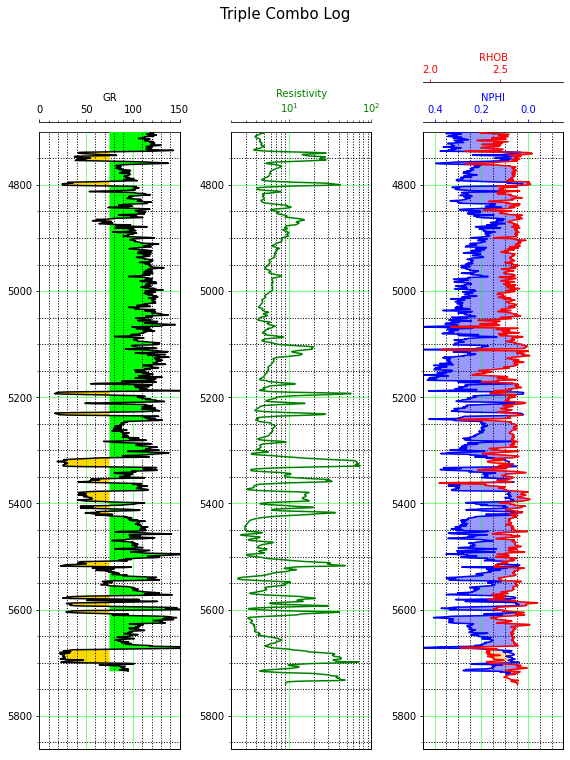

In [46]:
column_GR_18= 'GR'
column_resistivity_18 = 'RILD'
column_NPHI_18 = 'NPHInew'
column_RHOB_18 = 'RHOB'
min_depth = 4700
triple_combo(by18, column_depth_18, column_GR_18, column_resistivity_18, column_NPHI_18, column_RHOB_18, min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=75, min_resistivity=2, max_resistivity=100, color_GR='black', color_resistivity='green', color_RHOB='red', color_NPHI='blue', figsize=(6, 10), tight_layout=1, title_size=15, title_height=1.05)